In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import GlobalAveragePooling2D,Dense,Dropout,BatchNormalization
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import cv2
import glob

train_datagen = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
                                   rotation_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.3,
                                   zoom_range = 0.5,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab/Coursework2/Data',
                                                    target_size=(224,224),
                                                    batch_size = 64,
                                                    class_mode = 'categorical',
                                                    subset = 'training')
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab/Coursework2/Data',
                                                         target_size=(224,224),
                                                         batch_size = 64,
                                                         class_mode = 'categorical',
                                                         subset = 'validation')

Found 5872 images belonging to 15 classes.
Found 1460 images belonging to 15 classes.


In [ ]:
num_class = 15

base_model = MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(512,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(256,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
preds = Dense(num_class,activation='softmax')(x)

model = Model(inputs = base_model.input,outputs = preds)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
!mkdir ckpt2

In [ ]:
path1 = 'ckpt2/best.hdf5' 
Checkpoint = ModelCheckpoint(path1,monitor='val_loss',verbose= 1,save_best_only=True,save_weights_only=False,mode='min')
callback_list = [Checkpoint]

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
    
epochs = 50
lr_rate = 0.0005
decay_rate = lr_rate/epochs
opt = Adam(learning_rate=lr_rate,beta_1=0.9,beta_2=0.999,epsilon=None,decay = decay_rate,amsgrad=False)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size
step_size_valid = validation_generator.n//validation_generator.batch_size
h = model.fit(train_generator,
              steps_per_epoch = step_size_train,
              validation_data = validation_generator,
              validation_steps = step_size_valid,
              callbacks = callback_list,
              epochs = 10)

Epoch 1/10
91/91 [==============================] - 1917s 21s/step - loss: 1.2310 - accuracy: 0.6513 - val_loss: 0.5073 - val_accuracy: 0.9233

Epoch 00001: val_loss improved from inf to 0.50731, saving model to ckpt2/best.hdf5
Epoch 2/10
91/91 [==============================] - 146s 2s/step - loss: 0.1373 - accuracy: 0.9622 - val_loss: 0.1269 - val_accuracy: 0.9744

Epoch 00002: val_loss improved from 0.50731 to 0.12690, saving model to ckpt2/best.hdf5
Epoch 3/10
91/91 [==============================] - 145s 2s/step - loss: 0.0898 - accuracy: 0.9757 - val_loss: 0.0801 - val_accuracy: 0.9794

Epoch 00003: val_loss improved from 0.12690 to 0.08009, saving model to ckpt2/best.hdf5
Epoch 4/10
91/91 [==============================] - 145s 2s/step - loss: 0.0691 - accuracy: 0.9778 - val_loss: 0.0526 - val_accuracy: 0.9851

Epoch 00004: val_loss improved from 0.08009 to 0.05263, saving model to ckpt2/best.hdf5
Epoch 5/10
91/91 [==============================] - 145s 2s/step - loss: 0.0538 - 

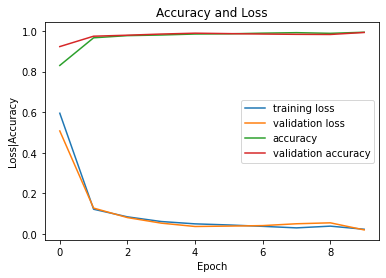

In [ ]:
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), h.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), h.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), h.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), h.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
def preprocess_image(image):
  if(image.shape[0] != 224 or image.shape[1] != 224):
    image = cv2.resize(image,(224,224),interpolation = cv2.INTER_NEAREST)
    image = (image/127.5)
    image = image - 1
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
model = load_model('/content/drive/MyDrive/Colab/Coursework2/ckpt2/best.hdf5')

In [ ]:
classes = train_generator.class_indices
classes = list(classes.keys())
classes

['Hiếu',
 'Hùng',
 'HĐức',
 'Kiên',
 'Linh',
 'Quân',
 'Tân',
 'Thắng',
 'Trường',
 'Tuấn',
 'Unknow',
 'Vân',
 'Việt Đức ',
 'Xuân Anh',
 'Đức']

In [ ]:
file = glob.glob('/content/drive/MyDrive/Colab/Coursework2/Test/*.jpg')

Tuấn


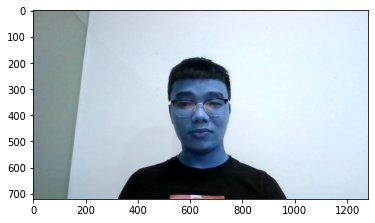

In [27]:
img = cv2.imread(file[3])
pred = model.predict(preprocess_image(img))
a = np.amax(pred)*100
result = classes[np.argmax(pred)]
print(result)
plt.imshow(img)
